In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1=pd.read_csv(r"E:\Upi_Fraud_Detection\upi_fraud_data.csv")

In [4]:
df1.head()

,transaction_id,timestamp,user_id,receiver_id,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud
0,1,2024-06-21 19:16:00,user_3862,user_1322,36715.31,send,Chennai,mobile,0,WiFi,evening,0
1,2,2024-04-03 14:38:00,user_1542,user_4536,45772.97,merchant_payment,Bangalore,mobile,0,4G,afternoon,0
2,3,2024-05-11 09:49:00,user_553,user_1312,4344.79,merchant_payment,Bangalore,tablet,0,5G,morning,0
3,4,2024-10-23 03:41:00,user_1351,user_4700,4329.27,receive,Ahmedabad,mobile,0,4G,night,0
4,5,2024-05-10 13:57:00,user_3068,user_872,43023.67,send,Hyderabad,mobile,0,5G,afternoon,0


In [5]:
df1.columns

Index(['transaction_id', 'timestamp', 'user_id', 'receiver_id', 'amount',
       'transaction_type', 'location', 'device_type', 'is_rooted_device',
       'network_type', 'time_of_day', 'is_fraud'],
      dtype='object')

In [6]:
#Data Types Overview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    5000 non-null   int64  
 1   timestamp         5000 non-null   object 
 2   user_id           5000 non-null   object 
 3   receiver_id       5000 non-null   object 
 4   amount            5000 non-null   float64
 5   transaction_type  5000 non-null   object 
 6   location          5000 non-null   object 
 7   device_type       5000 non-null   object 
 8   is_rooted_device  5000 non-null   int64  
 9   network_type      5000 non-null   object 
 10  time_of_day       5000 non-null   object 
 11  is_fraud          5000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 468.9+ KB


In [7]:
#Descriptive Analysis
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,5000.0,2500.5000,1443.520003,1.00,1250.7500,2500.50,3750.2500,5000.00
amount,5000.0,25276.2495,14509.299288,11.42,12757.8725,25456.19,37977.0225,49998.29
is_rooted_device,5000.0,0.0472,0.212088,0.00,0.0000,0.00,0.0000,1.00
is_fraud,5000.0,0.0332,0.179176,0.00,0.0000,0.00,0.0000,1.00


In [8]:
df1.isnull().sum()

transaction_id      0
timestamp           0
user_id             0
receiver_id         0
amount              0
transaction_type    0
location            0
device_type         0
is_rooted_device    0
network_type        0
time_of_day         0
is_fraud            0
dtype: int64

In [9]:
df1.duplicated().sum()

np.int64(0)

In [10]:
df1.shape

(5000, 12)

In [11]:
df1.nunique()

transaction_id      5000
timestamp           4976
user_id             3126
receiver_id         3169
amount              4996
transaction_type       3
location               8
device_type            2
is_rooted_device       2
network_type           3
time_of_day            4
is_fraud               2
dtype: int64

In [12]:
df1=df1.drop(["transaction_id","user_id","receiver_id"],axis=1)

In [13]:
df1.head()

,timestamp,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud
0,2024-06-21 19:16:00,36715.31,send,Chennai,mobile,0,WiFi,evening,0
1,2024-04-03 14:38:00,45772.97,merchant_payment,Bangalore,mobile,0,4G,afternoon,0
2,2024-05-11 09:49:00,4344.79,merchant_payment,Bangalore,tablet,0,5G,morning,0
3,2024-10-23 03:41:00,4329.27,receive,Ahmedabad,mobile,0,4G,night,0
4,2024-05-10 13:57:00,43023.67,send,Hyderabad,mobile,0,5G,afternoon,0


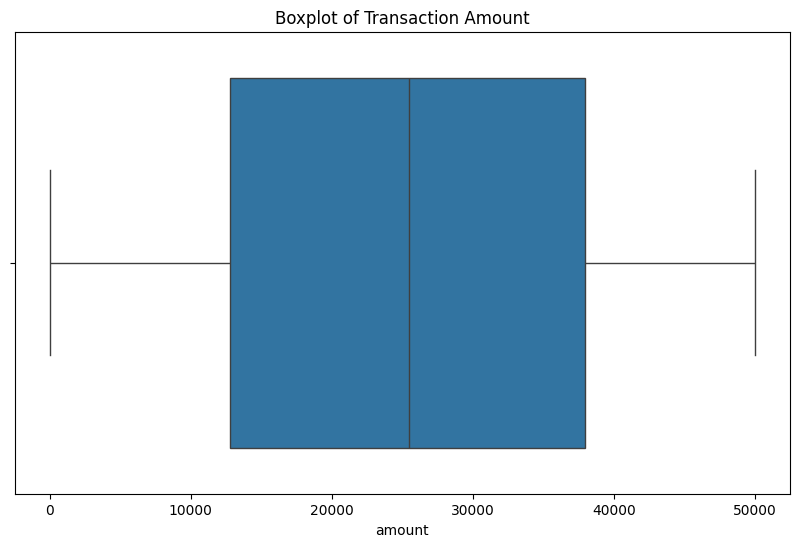

In [14]:
# Visualizing outliers in 'amount' using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()

In [15]:
# Convert timestamp to datetime format
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [16]:
# Check the datatype of 'timestamp'
print(df1['timestamp'].dtype)

datetime64[ns]


In [17]:
# Extract year, month, day, and hour from timestamp
df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month_name()
df1['day'] = df1['timestamp'].dt.day
df1['day_of_week'] = df1['timestamp'].dt.day_name()

In [18]:
df1.head()

,timestamp,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,year,month,day,day_of_week
0,2024-06-21 19:16:00,36715.31,send,Chennai,mobile,0,WiFi,evening,0,2024,June,21,Friday
1,2024-04-03 14:38:00,45772.97,merchant_payment,Bangalore,mobile,0,4G,afternoon,0,2024,April,3,Wednesday
2,2024-05-11 09:49:00,4344.79,merchant_payment,Bangalore,tablet,0,5G,morning,0,2024,May,11,Saturday
3,2024-10-23 03:41:00,4329.27,receive,Ahmedabad,mobile,0,4G,night,0,2024,October,23,Wednesday
4,2024-05-10 13:57:00,43023.67,send,Hyderabad,mobile,0,5G,afternoon,0,2024,May,10,Friday


In [19]:
df1=df1.drop(["timestamp"],axis=1)

In [20]:
df1.columns

Index(['amount', 'transaction_type', 'location', 'device_type',
       'is_rooted_device', 'network_type', 'time_of_day', 'is_fraud', 'year',
       'month', 'day', 'day_of_week'],
      dtype='object')

EDA

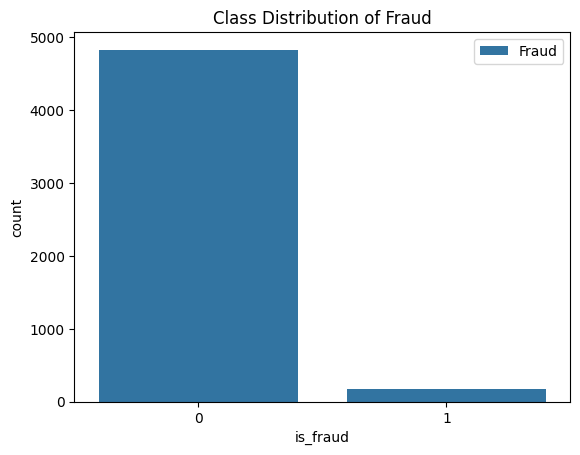

In [21]:
sns.countplot(x='is_fraud', data=df1,label="Fraud")
plt.title("Class Distribution of Fraud")
plt.show()


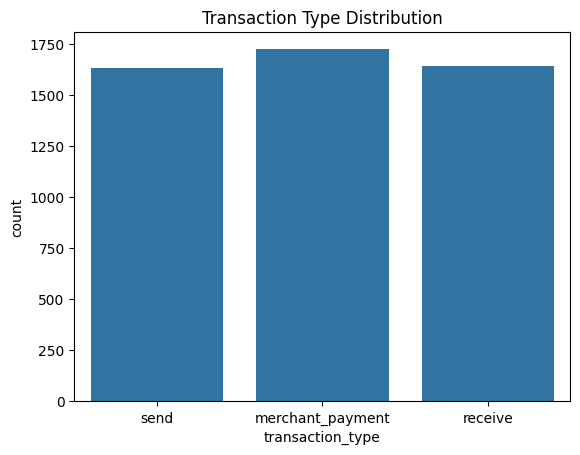

In [22]:
sns.countplot(x='transaction_type', data=df1)
plt.title("Transaction Type Distribution")
plt.show()


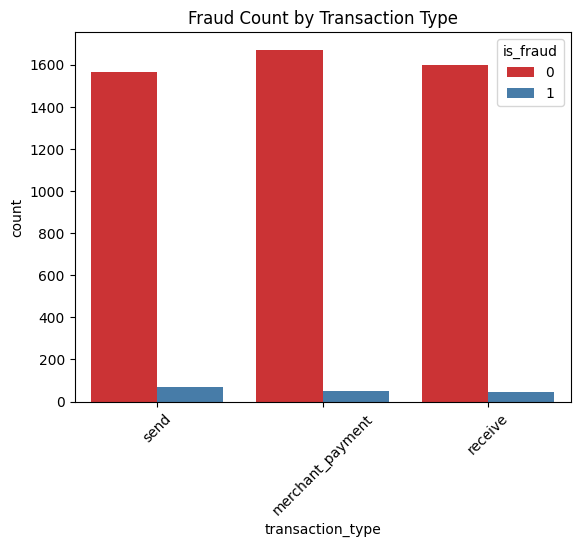

In [23]:
# Countplot for fraud per transaction type
sns.countplot(x='transaction_type', hue='is_fraud', data=df1, palette='Set1')
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45)
plt.show()


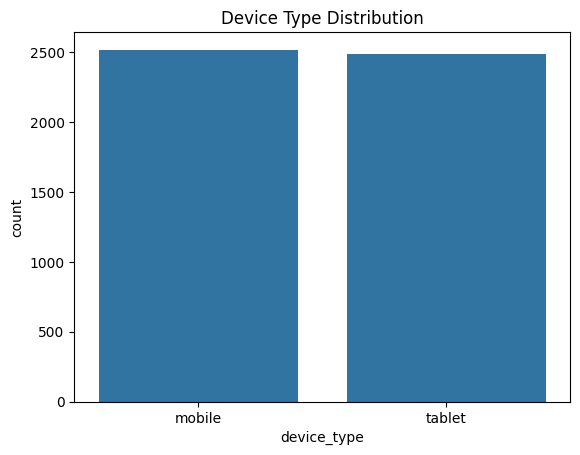

In [24]:
sns.countplot(x='device_type', data=df1)
plt.title("Device Type Distribution")
plt.show()

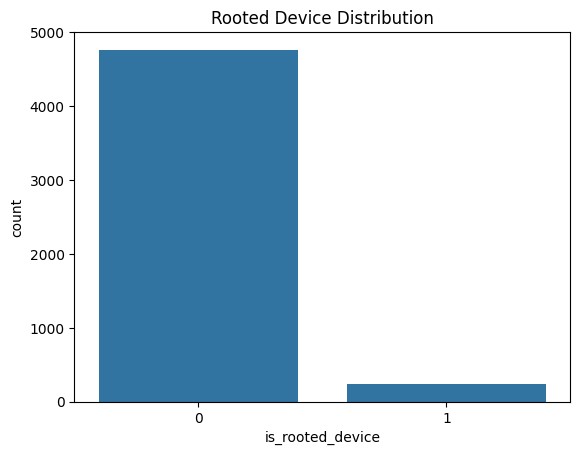

In [25]:
sns.countplot(x='is_rooted_device', data=df1)
plt.title("Rooted Device Distribution")
plt.show()

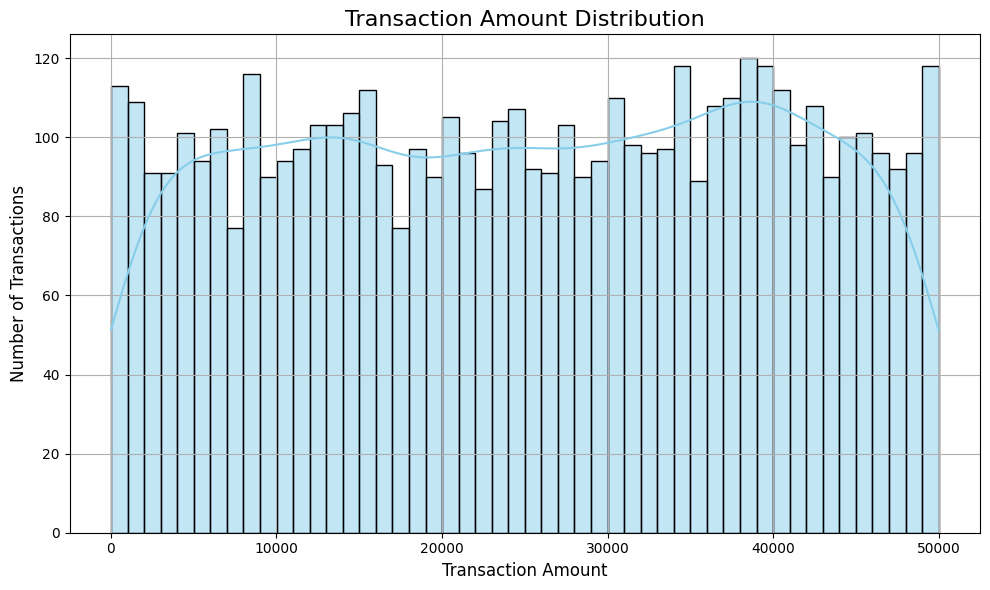

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['amount'], bins=50, kde=True, color='skyblue')

plt.title("Transaction Amount Distribution", fontsize=16)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
df1.dtypes

amount              float64
transaction_type     object
location             object
device_type          object
is_rooted_device      int64
network_type         object
time_of_day          object
is_fraud              int64
year                  int32
month                object
day                   int32
day_of_week          object
dtype: object

In [28]:
numeric_columns=df1.select_dtypes(["int64","int32","float64"])

In [29]:
numeric_columns.head()

,amount,is_rooted_device,is_fraud,year,day
0,36715.31,0,0,2024,21
1,45772.97,0,0,2024,3
2,4344.79,0,0,2024,11
3,4329.27,0,0,2024,23
4,43023.67,0,0,2024,10


In [30]:
correlation_matrix = numeric_columns.corr()

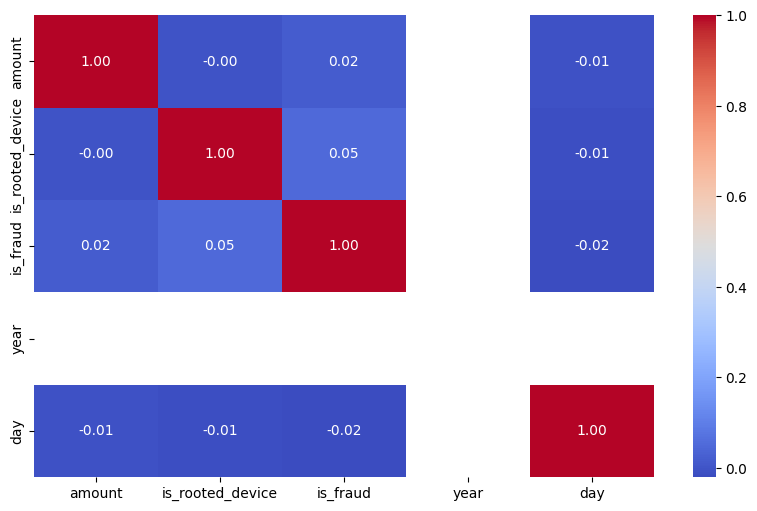

In [31]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [32]:
print(df1['year'].nunique())  # Number of unique years


1


In [33]:
df1["year"].nunique()

1

In [34]:
df1.drop(columns=['year'], inplace=True)

In [35]:
df1.head()

,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,month,day,day_of_week
0,36715.31,send,Chennai,mobile,0,WiFi,evening,0,June,21,Friday
1,45772.97,merchant_payment,Bangalore,mobile,0,4G,afternoon,0,April,3,Wednesday
2,4344.79,merchant_payment,Bangalore,tablet,0,5G,morning,0,May,11,Saturday
3,4329.27,receive,Ahmedabad,mobile,0,4G,night,0,October,23,Wednesday
4,43023.67,send,Hyderabad,mobile,0,5G,afternoon,0,May,10,Friday


In [36]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['amount','transaction_type', 'location', 'device_type', 
            'network_type', 'time_of_day','month','day_of_week',]

le = LabelEncoder()

for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])

In [37]:
df1.head()

,amount,transaction_type,location,device_type,is_rooted_device,network_type,time_of_day,is_fraud,month,day,day_of_week
0,3608,2,2,0,0,2,1,0,6,21,0
1,4577,0,1,0,0,0,0,0,0,3,6
2,427,0,1,1,0,1,2,0,8,11,2
3,424,1,0,0,0,0,3,0,10,23,6
4,4306,2,4,0,0,1,0,0,8,10,0


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   amount            5000 non-null   int64
 1   transaction_type  5000 non-null   int64
 2   location          5000 non-null   int64
 3   device_type       5000 non-null   int64
 4   is_rooted_device  5000 non-null   int64
 5   network_type      5000 non-null   int64
 6   time_of_day       5000 non-null   int64
 7   is_fraud          5000 non-null   int64
 8   month             5000 non-null   int64
 9   day               5000 non-null   int32
 10  day_of_week       5000 non-null   int64
dtypes: int32(1), int64(10)
memory usage: 410.3 KB


In [39]:
df1.dtypes

amount              int64
transaction_type    int64
location            int64
device_type         int64
is_rooted_device    int64
network_type        int64
time_of_day         int64
is_fraud            int64
month               int64
day                 int32
day_of_week         int64
dtype: object

In [40]:
from sklearn.preprocessing import StandardScaler
# Columns to scale
scale_cols = ['amount', 'day']
scaler = StandardScaler()
df1[scale_cols] = scaler.fit_transform(df1[scale_cols])


In [41]:
X = df1.drop('is_fraud', axis=1)  
y = df1['is_fraud'] 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
df1["is_fraud"].value_counts(normalize=True)*100

is_fraud
0    96.68
1     3.32
Name: proportion, dtype: float64

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X_train, y_train)
print(y_res.value_counts())

is_fraud
0    3862
1    3862
Name: count, dtype: int64


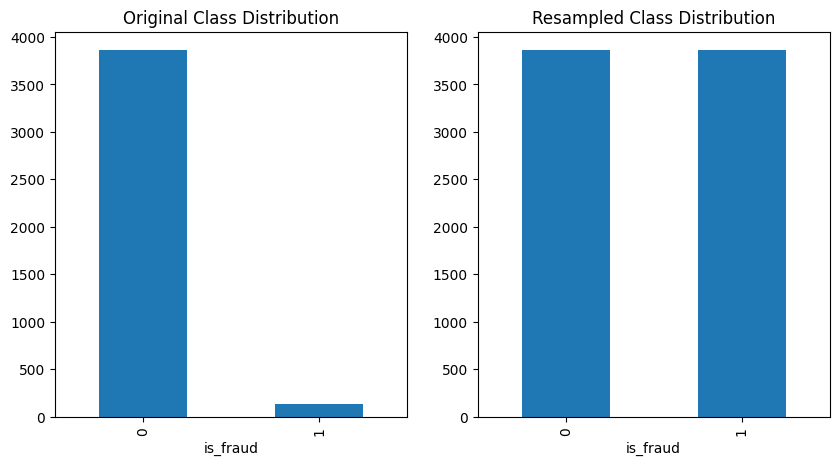

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Before SMOTE
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar')
plt.title('Original Class Distribution')

# After SMOTE
plt.subplot(1, 2, 2)
y_res.value_counts().plot(kind='bar')
plt.title('Resampled Class Distribution')

plt.show()


In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [47]:
y_pred_lr = model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, accuracy_score
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       972
           1       0.00      0.00      0.00        28

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
y_pred_dt = model.predict(X_test)

In [51]:
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree
Accuracy: 0.933
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       972
           1       0.09      0.14      0.11        28

    accuracy                           0.93      1000
   macro avg       0.53      0.55      0.54      1000
weighted avg       0.95      0.93      0.94      1000



In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

In [53]:
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       972
           1       0.00      0.00      0.00        28

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred_knn = knn.predict(X_test)

In [56]:
print("K-Nearest Neighbors Classification")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classification
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       972
           1       0.00      0.00      0.00        28

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



In [60]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=100,         
    learning_rate=0.1,         
    max_depth=6,               
    random_state=42   )

In [61]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:

y_pred_xgb = model.predict(X_test)
print("XGBoost Classification")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification
Accuracy: 0.972
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       972
           1       0.00      0.00      0.00        28

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Store predictions in a dictionary
y_preds = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "XGBoost": y_pred_xgb
}

# Initialize list to store results
results = []

# Calculate metrics for each model
for name, y_pred in y_preds.items():
    acc = accuracy_score(y_test, y_pred)
    
    # Precision, Recall, F1 for Fraud (class 1)
    prec_fraud = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    rec_fraud = recall_score(y_test, y_pred, pos_label=1)
    f1_fraud = f1_score(y_test, y_pred, pos_label=1)
    
    # Precision, Recall, F1 for Non-Fraud (class 0)
    prec_non_fraud = precision_score(y_test, y_pred, pos_label=0, zero_division=0)
    rec_non_fraud = recall_score(y_test, y_pred, pos_label=0)
    f1_non_fraud = f1_score(y_test, y_pred, pos_label=0)
    
    # Append results to the list with rounded values
    results.append([name, 
                    round(prec_fraud, 2), round(rec_fraud, 2), round(f1_fraud, 2), 
                    round(prec_non_fraud, 2), round(rec_non_fraud, 2), round(f1_non_fraud, 2)])

# Create a DataFrame from the results
df_results = pd.DataFrame(results, columns=[
    "Model", "Precision (Fraud)", "Recall (Fraud)", "F1-Score (Fraud)", 
    "Precision (Non-Fraud)", "Recall (Non-Fraud)", "F1-Score (Non-Fraud)"
])

# Display the comparison table
print(df_results.to_string(index=False))


              Model  Precision (Fraud)  Recall (Fraud)  F1-Score (Fraud)  Precision (Non-Fraud)  Recall (Non-Fraud)  F1-Score (Non-Fraud)
Logistic Regression               0.00            0.00              0.00                   0.97                1.00                  0.99
      Decision Tree               0.09            0.14              0.11                   0.97                0.96                  0.97
      Random Forest               0.00            0.00              0.00                   0.97                1.00                  0.99
                KNN               0.00            0.00              0.00                   0.97                1.00                  0.99
                SVM               0.00            0.00              0.00                   0.97                1.00                  0.99
            XGBoost               0.00            0.00              0.00                   0.97                1.00                  0.99


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['liblinear', 'saga'],         # Solver options
    'class_weight': ['balanced', None],      # Handle class imbalance
    'max_iter': [100, 200, 300]              # Number of iterations
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_lr.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Use the best model for predictions
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Best Parameters for Logistic Regression: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 300, 'solver': 'saga'}
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80       972
           1       0.05      0.54      0.08        28

    accuracy                           0.67      1000
   macro avg       0.51      0.61      0.44      1000
weighted avg       0.95      0.67      0.78      1000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30, None],             # Maximum depth of tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples per leaf
    'class_weight': ['balanced', None],          # Handle class imbalance
    'criterion': ['gini', 'entropy']             # Splitting criterion
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Use the best model for predictions
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Best Parameters for Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       972
           1       0.00      0.00      0.00        28

    accuracy                           0.96      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.94      0.96      0.95      1000



In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],           # Number of trees in forest
    'max_depth': [10, 20, 30, None],            # Maximum depth of tree
    'min_samples_split': [2, 5, 10],            # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],              # Minimum samples per leaf
    'class_weight': ['balanced', None]          # Handle class imbalance
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       972
           1       0.00      0.00      0.00        28

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],               # Number of neighbors
    'weights': ['uniform', 'distance'],         # Weight function
    'metric': ['euclidean', 'manhattan'],      # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute nearest neighbors
}

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Use the best model for predictions
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluation
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))


Best Parameters for KNN: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       972
           1       0.00      0.00      0.00        28

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.94      0.97      0.96      1000



In [68]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],      # Step size
    'max_depth': [3, 6, 10],                 # Depth of each tree
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples to train on
    'colsample_bytree': [0.8, 0.9, 1.0],    # Fraction of features to use
    'scale_pos_weight': [1, 10, 20],         # Weight for positive class
    'class_weight': ['balanced', None]       # Handle class imbalance
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid_xgb, cv=5, n_jobs=-1, scoring='f1')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Use the best model for predictions
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Best Parameters for XGBoost: {'class_weight': 'balanced', 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 10, 'subsample': 1.0}
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       972
           1       0.12      0.11      0.11        28

    accuracy                           0.95      1000
   macro avg       0.55      0.54      0.54      1000
weighted avg       0.95      0.95      0.95      1000



In [90]:
import numpy as np
from sklearn.metrics import f1_score

def best_threshold(y_true, y_proba):
    thresholds = np.arange(0.0, 1.01, 0.01)
    best_thresh = 0.5
    best_f1 = 0.0
    for thresh in thresholds:
        y_pred = (y_proba > thresh).astype(int)
        f1 = f1_score(y_true, y_pred, pos_label=1)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh, best_f1


In [91]:
proba_lr = best_lr.predict_proba(X_test)[:, 1]
thresh_lr, f1_lr = best_threshold(y_test, proba_lr)
pred_lr = (proba_lr > thresh_lr).astype(int)

print(f"Best Threshold (Logistic Regression): {thresh_lr:.2f}, F1: {f1_lr:.2f}")
print(classification_report(y_test, pred_lr, digits=2))


Best Threshold (Logistic Regression): 0.76, F1: 0.15
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       972
           1       0.15      0.14      0.15        28

    accuracy                           0.95      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.95      0.95      0.95      1000



In [92]:
proba_dt = best_dt.predict_proba(X_test)[:, 1]
thresh_dt, f1_dt = best_threshold(y_test, proba_dt)
pred_dt = (proba_dt > thresh_dt).astype(int)

print(f"Best Threshold (Decision Tree): {thresh_dt:.2f}, F1: {f1_dt:.2f}")
print(classification_report(y_test, pred_dt, digits=2))


Best Threshold (Decision Tree): 0.12, F1: 0.05
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       972
           1       0.03      0.11      0.05        28

    accuracy                           0.88      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.95      0.88      0.91      1000



In [93]:
proba_rf = best_rf.predict_proba(X_test)[:, 1]
thresh_rf, f1_rf = best_threshold(y_test, proba_rf)
pred_rf = (proba_rf > thresh_rf).astype(int)

print(f"Best Threshold (Random Forest): {thresh_rf:.2f}, F1: {f1_rf:.2f}")
print(classification_report(y_test, pred_rf, digits=2))


Best Threshold (Random Forest): 0.35, F1: 0.08
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       972
           1       0.08      0.07      0.08        28

    accuracy                           0.95      1000
   macro avg       0.53      0.52      0.53      1000
weighted avg       0.95      0.95      0.95      1000



In [94]:
proba_knn = best_knn.predict_proba(X_test)[:, 1]
thresh_knn, f1_knn = best_threshold(y_test, proba_knn)
pred_knn = (proba_knn > thresh_knn).astype(int)

print(f"Best Threshold (KNN): {thresh_knn:.2f}, F1: {f1_knn:.2f}")
print(classification_report(y_test, pred_knn, digits=2))


Best Threshold (KNN): 0.00, F1: 0.04
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       972
           1       0.02      0.07      0.04        28

    accuracy                           0.89      1000
   macro avg       0.50      0.49      0.49      1000
weighted avg       0.95      0.89      0.92      1000



In [95]:
proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
thresh_xgb, f1_xgb = best_threshold(y_test, proba_xgb)
pred_xgb = (proba_xgb > thresh_xgb).astype(int)

print(f"Best Threshold (XGBoost): {thresh_xgb:.2f}, F1: {f1_xgb:.2f}")
print(classification_report(y_test, pred_xgb, digits=2))


Best Threshold (XGBoost): 0.42, F1: 0.18
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       972
           1       0.15      0.21      0.18        28

    accuracy                           0.94      1000
   macro avg       0.56      0.59      0.57      1000
weighted avg       0.95      0.94      0.95      1000



In [100]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balanced Random Forest
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)
print("Balanced Random Forest Report:")
print(classification_report(y_test, y_pred_brf))

# Easy Ensemble Classifier
eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)
print("Easy Ensemble Classifier Report:")
print(classification_report(y_test, y_pred_eec))


Balanced Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       967
           1       0.04      0.21      0.07        33

    accuracy                           0.82      1000
   macro avg       0.51      0.52      0.48      1000
weighted avg       0.94      0.82      0.87      1000

Easy Ensemble Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.50      0.66       967
           1       0.04      0.58      0.07        33

    accuracy                           0.51      1000
   macro avg       0.51      0.54      0.37      1000
weighted avg       0.94      0.51      0.64      1000



In [101]:
def find_best_threshold(model, X_test, y_test):
    y_proba = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0, 1, 101)
    
    best_f1 = 0
    best_threshold = 0
    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = thresh
            
    # Final prediction with best threshold
    y_pred_final = (y_proba >= best_threshold).astype(int)
    
    print(f"🔹 Best Threshold: {best_threshold:.2f}")
    print(f"Precision: {precision_score(y_test, y_pred_final):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred_final):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_final):.2f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.2f}")
    
    return best_threshold, y_pred_final


In [102]:
brf = BalancedRandomForestClassifier(random_state=42, n_estimators=100)
brf.fit(X_train, y_train)

print("Balanced Random Forest Threshold Tuning:")
best_thresh_brf, pred_brf = find_best_threshold(brf, X_test, y_test)

Balanced Random Forest Threshold Tuning:
🔹 Best Threshold: 0.68
Precision: 0.40
Recall: 0.06
F1 Score: 0.11
Accuracy: 0.97


In [103]:
eec = EasyEnsembleClassifier(random_state=42, n_estimators=10)
eec.fit(X_train, y_train)

print("\nEasy Ensemble Classifier Threshold Tuning:")
best_thresh_eec, pred_eec = find_best_threshold(eec, X_test, y_test)



Easy Ensemble Classifier Threshold Tuning:
🔹 Best Threshold: 0.58
Precision: 0.15
Recall: 0.15
F1 Score: 0.15
Accuracy: 0.94


In [107]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predicted probabilities for class 1
y_proba = model.predict_proba(X_test)[:, 1]  # model = your trained classifier

# Define fine threshold range (focus on likely optimal zone)
thresholds = np.arange(0.2, 0.61, 0.01)

best_threshold = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)

    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"\n🔹 Best Threshold: {best_threshold:.2f} | Best F1 Score: {best_f1:.2f}")


Threshold: 0.20 | Precision: 0.06 | Recall: 0.85 | F1: 0.12
Threshold: 0.21 | Precision: 0.07 | Recall: 0.82 | F1: 0.12
Threshold: 0.22 | Precision: 0.07 | Recall: 0.82 | F1: 0.13
Threshold: 0.23 | Precision: 0.08 | Recall: 0.82 | F1: 0.14
Threshold: 0.24 | Precision: 0.08 | Recall: 0.82 | F1: 0.15
Threshold: 0.25 | Precision: 0.09 | Recall: 0.82 | F1: 0.16
Threshold: 0.26 | Precision: 0.09 | Recall: 0.79 | F1: 0.17
Threshold: 0.27 | Precision: 0.10 | Recall: 0.76 | F1: 0.17
Threshold: 0.28 | Precision: 0.11 | Recall: 0.76 | F1: 0.19
Threshold: 0.29 | Precision: 0.12 | Recall: 0.73 | F1: 0.20
Threshold: 0.30 | Precision: 0.13 | Recall: 0.73 | F1: 0.23
Threshold: 0.31 | Precision: 0.15 | Recall: 0.73 | F1: 0.24
Threshold: 0.32 | Precision: 0.15 | Recall: 0.73 | F1: 0.26
Threshold: 0.33 | Precision: 0.17 | Recall: 0.73 | F1: 0.28
Threshold: 0.34 | Precision: 0.18 | Recall: 0.67 | F1: 0.28
Threshold: 0.35 | Precision: 0.19 | Recall: 0.64 | F1: 0.29
Threshold: 0.36 | Precision: 0.19 | Reca

In [109]:
import numpy as np
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # Replace 'model' with your classifier

# Define thresholds to try
thresholds = np.arange(0.1, 0.91, 0.01)

best_thresh = 0.5
best_f1 = 0

for thresh in thresholds:
    y_pred = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

# Final prediction using best threshold
y_pred_final = (y_proba >= best_thresh).astype(int)

print(f"\n🔹 Best Threshold: {best_thresh:.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_final):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, zero_division=0))



🔹 Best Threshold: 0.50
F1 Score: 0.58
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.73      0.48      0.58        33

    accuracy                           0.98      1000
   macro avg       0.85      0.74      0.78      1000
weighted avg       0.97      0.98      0.97      1000



In [117]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

# Train model
model_brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
model_brf.fit(X_train, y_train)

# Predict probabilities
y_proba_brf = model_brf.predict_proba(X_test)[:, 1]

# Threshold tuning (optimize for best F1)
thresholds = np.arange(0, 1.01, 0.01)
best_f1 = 0
best_thresh = 0

for t in thresholds:
    y_pred = (y_proba_brf >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# Final prediction and report
y_final = (y_proba_brf >= best_thresh).astype(int)
print(f"🔹 Balanced Random Forest — Best Threshold: {best_thresh:.2f}")
print("Precision:", round(precision_score(y_test, y_final), 2))
print("Recall:", round(recall_score(y_test, y_final), 2))
print("F1 Score:", round(f1_score(y_test, y_final), 2))
print("Accuracy:", round(accuracy_score(y_test, y_final), 2))
print("\nClassification Report:\n", classification_report(y_test, y_final))


🔹 Balanced Random Forest — Best Threshold: 0.68
Precision: 0.4
Recall: 0.06
F1 Score: 0.11
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       967
           1       0.40      0.06      0.11        33

    accuracy                           0.97      1000
   macro avg       0.68      0.53      0.54      1000
weighted avg       0.95      0.97      0.95      1000



In [118]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Train model
model_ee = EasyEnsembleClassifier(n_estimators=10, random_state=42)
model_ee.fit(X_train, y_train)

# Predict probabilities
y_proba_ee = model_ee.predict_proba(X_test)[:, 1]

# Threshold tuning (optimize for best F1)
thresholds = np.arange(0, 1.01, 0.01)
best_f1 = 0
best_thresh = 0

for t in thresholds:
    y_pred = (y_proba_ee >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# Final prediction and report
y_final = (y_proba_ee >= best_thresh).astype(int)
print(f"🔹 Easy Ensemble Classifier — Best Threshold: {best_thresh:.2f}")
print("Precision:", round(precision_score(y_test, y_final), 2))
print("Recall:", round(recall_score(y_test, y_final), 2))
print("F1 Score:", round(f1_score(y_test, y_final), 2))
print("Accuracy:", round(accuracy_score(y_test, y_final), 2))
print("\nClassification Report:\n", classification_report(y_test, y_final))


🔹 Easy Ensemble Classifier — Best Threshold: 0.58
Precision: 0.15
Recall: 0.15
F1 Score: 0.15
Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       967
           1       0.15      0.15      0.15        33

    accuracy                           0.94      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.94      0.94      0.94      1000



In [119]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Define base models
base_models = [
    ('lr', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])), 
                          use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Define meta-model
meta_model = LogisticRegression(random_state=42)

# Build stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    n_jobs=-1
)

# Create pipeline with SMOTE
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('stacking', stacking_clf)
])

# Train model
pipeline.fit(X_train, y_train)

# Predict probabilities
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Optional: threshold tuning (can sweep from 0.1 to 0.9 for best F1)
threshold = 0.5  # default
y_pred = (y_probs >= threshold).astype(int)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.953
F1 Score: 0.0784313725490196
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       967
           1       0.11      0.06      0.08        33

    accuracy                           0.95      1000
   macro avg       0.54      0.52      0.53      1000
weighted avg       0.94      0.95      0.95      1000



In [120]:
import numpy as np

best_threshold = 0
best_f1 = 0
for thresh in np.arange(0.01, 0.9, 0.01):
    y_pred_thresh = (y_probs >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"🔹 Best Threshold: {round(best_threshold, 2)}")
print("F1 Score:", round(best_f1, 4))
y_pred_final = (y_probs >= best_threshold).astype(int)
print("Accuracy:", round(accuracy_score(y_test, y_pred_final), 4))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


🔹 Best Threshold: 0.26
F1 Score: 0.1493
Accuracy: 0.943
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       967
           1       0.15      0.15      0.15        33

    accuracy                           0.94      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.94      0.94      0.94      1000



In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

# Base learners with class_weight='balanced'
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))
]

# Meta learner with class_weight='balanced'
meta_learner = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=True
)

# Fit Stacking
stacking_model.fit(X_train, y_train)

# Predict probabilities and apply threshold tuning
probs = stacking_model.predict_proba(X_test)[:, 1]

# Example threshold tuning loop
thresholds = np.arange(0.1, 0.9, 0.05)
best_thresh, best_f1 = 0.5, 0
for t in thresholds:
    preds = (probs >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"Best Threshold: {best_thresh:.2f}")
final_preds = (probs >= best_thresh).astype(int)

print(f"Accuracy: {accuracy_score(y_test, final_preds):.3f}")
print(f"F1 Score: {f1_score(y_test, final_preds):.4f}")
print("Classification Report:")
print(classification_report(y_test, final_preds))


# BalancedBaggingClassifier example with Decision Tree base
bb_clf = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    sampling_strategy='auto',
    replacement=False,
    random_state=42,
    n_estimators=50,
    n_jobs=-1
)

bb_clf.fit(X_train, y_train)

probs_bb = bb_clf.predict_proba(X_test)[:, 1]

best_thresh_bb, best_f1_bb = 0.5, 0
for t in thresholds:
    preds_bb = (probs_bb >= t).astype(int)
    f1_bb = f1_score(y_test, preds_bb)
    if f1_bb > best_f1_bb:
        best_f1_bb = f1_bb
        best_thresh_bb = t

print(f"\nBalancedBaggingClassifier Best Threshold: {best_thresh_bb:.2f}")
final_preds_bb = (probs_bb >= best_thresh_bb).astype(int)

print(f"Accuracy: {accuracy_score(y_test, final_preds_bb):.3f}")
print(f"F1 Score: {best_f1_bb:.4f}")
print("Classification Report:")
print(classification_report(y_test, final_preds_bb))


Best Threshold: 0.55
Accuracy: 0.852
F1 Score: 0.1084
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       967
           1       0.07      0.27      0.11        33

    accuracy                           0.85      1000
   macro avg       0.52      0.57      0.51      1000
weighted avg       0.94      0.85      0.89      1000


BalancedBaggingClassifier Best Threshold: 0.50
Accuracy: 0.794
F1 Score: 0.1043
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       967
           1       0.06      0.36      0.10        33

    accuracy                           0.79      1000
   macro avg       0.52      0.59      0.49      1000
weighted avg       0.94      0.79      0.86      1000

